In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings                 # to deal with warning messages
warnings.filterwarnings('ignore')

In [3]:
ins_data=pd.read_csv('insurance_data.csv')

In [4]:
ins_data.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [5]:
## i will drop index and patientId because it is not needed to find calim
ins_data.drop(['index','PatientID'],axis=1,inplace=True)

In [6]:
ins_data.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [7]:
## find details about data
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1335 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1337 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 94.3+ KB


In [8]:
ins_data['gender'].value_counts()

male      678
female    662
Name: gender, dtype: int64

In [9]:
ins_data['age'].describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

 average age is 38 years 

In [10]:
## describe method give ideas about feature which contain numerical value
ins_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1335.0,38.078652,11.102924,18.00,29.000,38.000,47.000,60.00
bmi,1340.0,30.668955,6.106735,16.00,26.275,30.400,34.700,53.10
bloodpressure,1340.0,94.157463,11.434712,80.00,86.000,92.000,99.000,140.00
children,1340.0,1.093284,1.205334,0.00,0.000,1.000,2.000,5.00
claim,1340.0,13252.745642,12109.609288,1121.87,4719.685,9369.615,16604.305,63770.43


# average bloodpressure is 94.157 and max is 140

In [11]:
ins_data.shape

(1340, 9)

In [12]:
## check missing value in data set

ins_data.isnull().sum()

age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [13]:
## handle missing value
ins_data['age'].value_counts()

43.0    50
26.0    47
46.0    44
30.0    44
32.0    44
40.0    42
27.0    41
37.0    41
48.0    40
45.0    40
29.0    39
34.0    39
49.0    38
31.0    38
42.0    37
47.0    37
36.0    37
35.0    36
28.0    36
44.0    35
33.0    35
50.0    32
38.0    32
25.0    32
19.0    29
23.0    28
55.0    26
20.0    26
39.0    26
41.0    24
22.0    24
59.0    22
57.0    21
60.0    21
21.0    18
52.0    18
56.0    18
54.0    17
51.0    17
58.0    17
24.0    16
18.0    16
53.0    15
Name: age, dtype: int64

In [14]:
ins_data['age'].mode()[0]

43.0

In [15]:
## handle missing vaue of age
ins_data['age']=ins_data['age'].fillna(ins_data['age'].mode()[0])

In [16]:
ins_data['age'].isnull().sum()

0

In [17]:
## handle missing value of region 
ins_data['region'].mode()[0]

'southeast'

In [18]:
ins_data['region']=ins_data['region'].fillna(ins_data['region'].mode()[0])

In [19]:
ins_data['region'].isnull().sum()

0

In [20]:
ins_data.isnull().sum()

age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [21]:
ins_data.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,43.0,male,33.3,82,Yes,0,No,southeast,1135.94
3,43.0,male,33.7,80,No,0,No,northwest,1136.40
4,43.0,male,34.1,100,No,0,No,northwest,1137.01


In [22]:
ins_data.shape

(1340, 9)

In [23]:
## Relabeling the categories in 'diabetic', 'smoker', 'children' variables appropriatly with .replace() function
## This helps in having a greater understanding of contents in charts & plots

ins_data['diabetic'] =ins_data['diabetic'].replace({'Yes': 'diabetic', 'No': 'non-diabetic'})

ins_data['smoker'] =ins_data['smoker'].replace({'Yes': 'smoker', 'No': 'non-smoker'})

ins_data['children'] =ins_data['children'].replace({0 : 'none', 1 : 'one', 2:'two', 3:'three', 4:'four', 5:'five', 6:'six'})

# explotray data analysis

In [24]:
pd.crosstab(ins_data['region'],ins_data['gender'], margins = True, margins_name = "Total").sort_values(by="Total", ascending=True)

gender,female,male,Total
region,,,
northeast,112,119,231
southwest,162,152,314
northwest,164,185,349
southeast,224,222,446
Total,662,678,1340


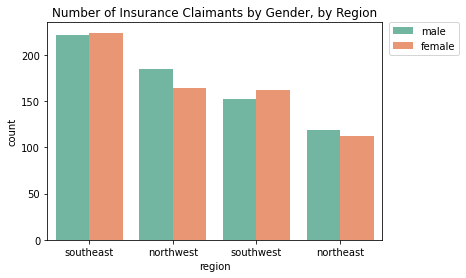

In [25]:
## i will use countplot() to visulize the data
sns.countplot(x='region', hue='gender', palette="Set2", data=ins_data).set(title='Number of Insurance Claimants by Gender, by Region')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

(1) the plot revealts that southeast has higher claims overall
(2)southeast higher insurance claim by female and northwest higher insurance claim by male

[Text(0.5, 1.0, 'Number of Insurance Claimants by Gender, by Age')]

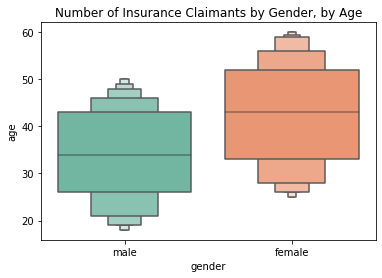

In [26]:
# create boxplot gender vs age of insurance claim
sns.boxenplot(x='gender', y='age', palette="Set2", data=ins_data).set(title='Number of Insurance Claimants by Gender, by Age')

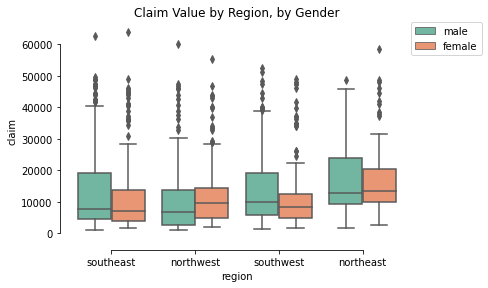

In [27]:
sns.boxplot(x="region", y="claim",hue="gender", palette="Set2",data=ins_data).set(title='Claim Value by Region, by Gender')
sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

<AxesSubplot:xlabel='bmi'>

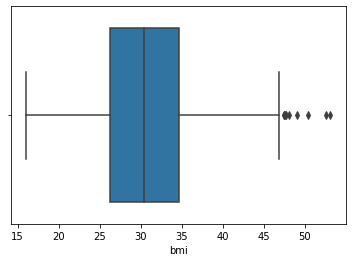

In [28]:
sns.boxplot(ins_data['bmi'])

In [29]:
## handale outlier of bmi
q1,q3=ins_data['bmi'].quantile([.25,.75])
IQR=q3-q1
IQR

8.425000000000004

In [30]:
LL=q1-1.5*(IQR)
UL=q3+1.5*(IQR)
LL,UL

(13.637499999999992, 47.337500000000006)

In [31]:
ins_data['bmi']=np.where(ins_data['bmi']>UL,UL,ins_data['bmi'])

<AxesSubplot:xlabel='bmi'>

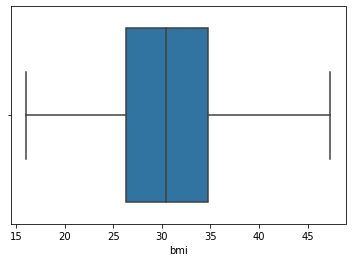

In [32]:
sns.boxplot(ins_data['bmi'])

<AxesSubplot:xlabel='bloodpressure'>

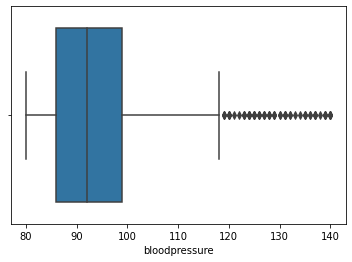

In [33]:
## ploting boxplot for checking outlier in bloodpressure
sns.boxplot(ins_data['bloodpressure'])

accourding to graph there is outlier

In [34]:
## i will handle ouitlier using IQR method
q1,q3=ins_data['bloodpressure'].quantile([.25,.75])
IQR=q3-q1
IQR

13.0

In [35]:
LL=q1-1.5*(IQR)
UL=q3+1.5*(IQR)
LL,UL

(66.5, 118.5)

In [36]:
ins_data['bloodpressure']=np.where(ins_data['bloodpressure']>UL,UL,ins_data['bloodpressure'])

<AxesSubplot:xlabel='bloodpressure'>

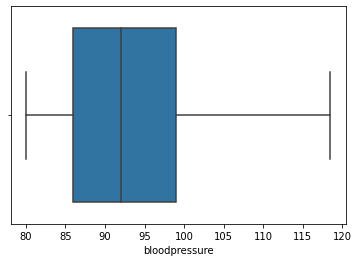

In [37]:
sns.boxplot(ins_data['bloodpressure'])

## i have remove the outlier from bloodpressure

<AxesSubplot:xlabel='bloodpressure', ylabel='Density'>

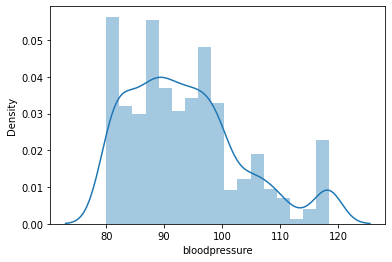

In [38]:
sns.distplot(ins_data['bloodpressure'])

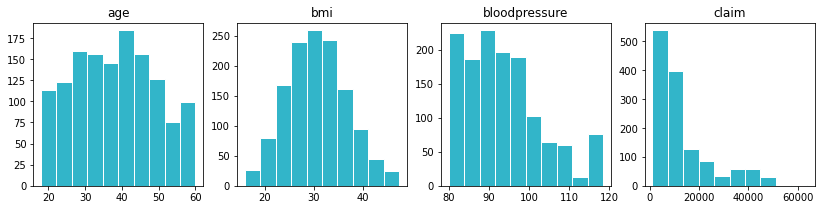

In [39]:
fig, axes = plt.subplots(1, 4, figsize=(14,3))

age = ins_data.age.hist(ax=axes[0], color="#32B5C9",ec="white", grid=False).set_title('age')

bmi = ins_data.bmi.hist(ax=axes[1], color="#32B5C9", ec="white", grid=False).set_title('bmi')

bloodpressure=ins_data.bloodpressure.hist(ax=axes[2],color="#32B5C9",ec="white",grid=False).set_title('bloodpressure')
claim =ins_data.claim.hist(ax=axes[3],color="#32B5C9", ec="white", grid=False).set_title('claim')

Histograms generated show

age of individuals is more or less equally distributed

bmi displays  normal distribution

bloodpressure display typically skewed

claims have higher positive skewness

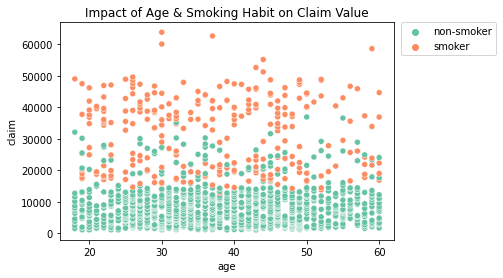

In [40]:
## Scatterplots help in understanding the impact of habits & health conditions on insurance claim value
## Let us try analyse the impact of smoking habit and age on claim value

sns.scatterplot(x='age', y='claim', hue='smoker', palette="Set2", data=ins_data).set(title='Impact of Age & Smoking Habit on Claim Value')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()


The plot reveals that claim value is typiclly high for people with smoking habit

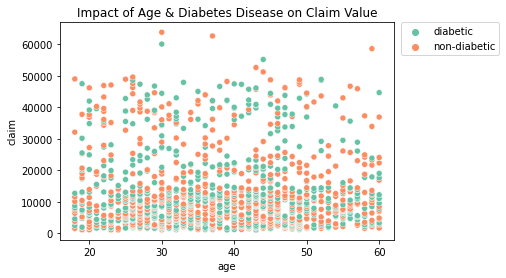

In [41]:
## Impact of diabetes disease and age on claim value
sns.scatterplot(x='age', y='claim', hue='diabetic', palette="Set2", data=ins_data).set(title='Impact of Age & Diabetes Disease on Claim Value')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

The plot reveals that there is no significant correlation between claim value and prevalence of diabetes

In [42]:
ins_data['diabetic'].value_counts()

non-diabetic    698
diabetic        642
Name: diabetic, dtype: int64

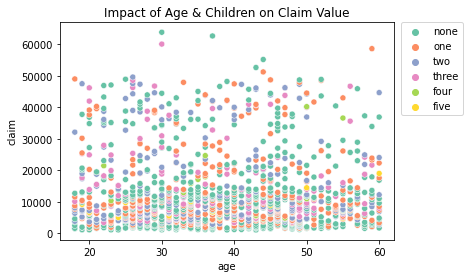

In [43]:
## Impact of number of children and age on claim value 
sns.scatterplot(x='age', y='claim', hue='children', palette="Set2", data=ins_data).set(title='Impact of Age & Children on Claim Value')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

(1)The plot reveals that there is no significant correlation between claim value and number of   children the claim holder has

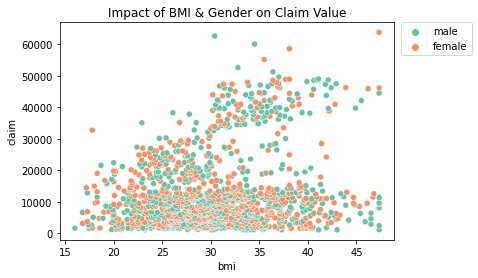

In [44]:
## Impact of bmi on claim value, by gender
sns.scatterplot(x='bmi', y='claim', hue='gender', palette="Set2", data=ins_data).set(title='Impact of BMI & Gender on Claim Value')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

(1)The plot reveals that there is certain degree of correlation between claim value and bmi, in both male & female groups

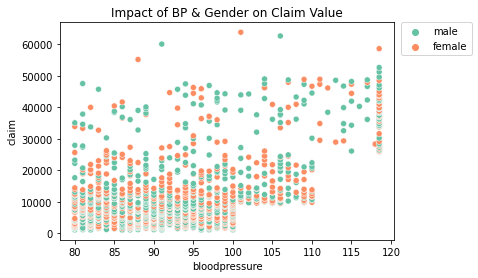

In [45]:
##Impact of bloodpressure on claim value, by gender
sns.scatterplot(x='bloodpressure', y='claim', hue='gender', palette="Set2", data=ins_data).set(title='Impact of BP & Gender on Claim Value')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

the plot reveals that there is no significant correlation between claim value and bloodpressure in both male and female groups

In [46]:
## Pie charts help in determining the % share of each category in a feature variable
## First we will define colors for Pie chart (about 6 colors are sufficient here)
colors = ({'custom': 'turquoise', 'silver': 'silver', 'grey': 'grey', 'blue': 'blue', 'lightskyblue': 'lightskyblue', 'white': 'antiquewhite'})

In [47]:
## Total claims by region
regions =ins_data[['region', 'claim']].groupby('region').sum().sort_values(by="claim", ascending=True)
regions

,claim
region,
northeast,3901369.33
southwest,3995062.77
northwest,4073558.87
southeast,5788688.19


array([<AxesSubplot:ylabel='claim'>], dtype=object)

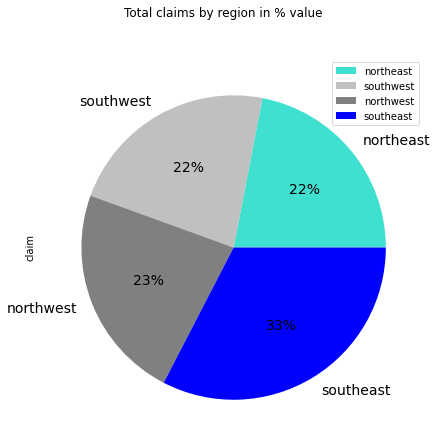

In [48]:
regions.plot(kind='pie', subplots=True, figsize=(12,7), fontsize = 14, colors = colors.values(), title='Total claims by region in % value', autopct='%1.0f%%')

In [49]:
## Total claims by gender
gender =ins_data[['gender', 'claim']].groupby('gender').sum().sort_values(by="claim", ascending=True)
gender

,claim
gender,
female,8321061.23
male,9437617.93


In [50]:
## Total claims by smoking habit
smokers =ins_data[['smoker', 'claim']].groupby('smoker').sum().sort_values(by="claim", ascending=True)
smokers

,claim
smoker,
smoker,8781763.56
non-smoker,8976915.60


array([<AxesSubplot:ylabel='claim'>], dtype=object)

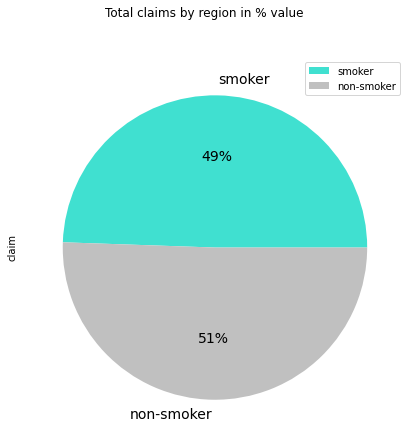

In [51]:
smokers.plot(kind='pie', subplots=True, figsize=(12,7), fontsize = 14, colors = colors.values(), title='Total claims by region in % value', autopct='%1.0f%%')

In [52]:
## Build a new ageGroup feature, with 6 age bands, of 7 years each
age_band = [18,25,32,39,46,53,60]
ins_data['age_group'] = pd.cut(ins_data['age'], bins=age_band)
ageGroup =ins_data[['age_group', 'claim']].groupby('age_group').sum().sort_values(by="claim", ascending=False)
ageGroup

,claim
age_group,
"(25, 32]",3972132.28
"(39, 46]",3726873.10
"(32, 39]",3151344.51
"(46, 53]",2488434.04
"(18, 25]",2461805.34
"(53, 60]",1786511.82


array([<AxesSubplot:ylabel='claim'>], dtype=object)

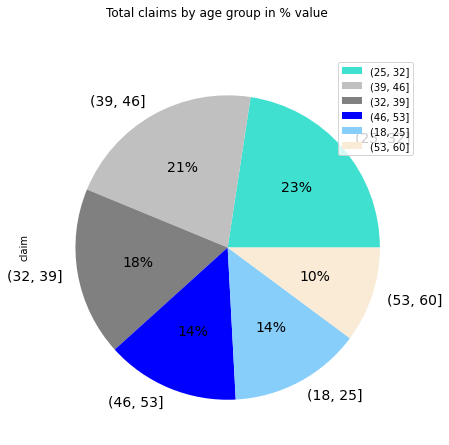

In [53]:
## Total claims by age group 
ageGroup.plot(kind='pie', subplots=True, figsize=(12,7), fontsize = 14, colors = colors.values(), title='Total claims by age group in % value', autopct='%1.0f%%')

In [54]:
ins_data.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,39.0,male,23.2,91.0,diabetic,none,non-smoker,southeast,1121.87,"(32, 39]"
1,24.0,male,30.1,87.0,non-diabetic,none,non-smoker,southeast,1131.51,"(18, 25]"
2,43.0,male,33.3,82.0,diabetic,none,non-smoker,southeast,1135.94,"(39, 46]"
3,43.0,male,33.7,80.0,non-diabetic,none,non-smoker,northwest,1136.40,"(39, 46]"
4,43.0,male,34.1,100.0,non-diabetic,none,non-smoker,northwest,1137.01,"(39, 46]"


In [55]:
# import libraries to prepaired data and feature scaling
from sklearn.preprocessing import LabelEncoder,StandardScaler

## machine lerning labraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [56]:
## splitting Categorical and Numerical data

cat_df =ins_data[['gender', 'diabetic', 'children', 'smoker', 'region']]
num_df =ins_data[['age', 'bmi', 'bloodpressure', 'claim']]

In [57]:
## labelEncoder
label=LabelEncoder()


## select categorical columns

cat_df=ins_data.select_dtypes(exclude=["int","float"])

for i in cat_df:
    cat_df[i] = label.fit_transform(ins_data[i])

In [58]:
#joining the data to the numeric data

num_df =ins_data.select_dtypes(include=['int', 'float'])

main_df = pd.concat([num_df, cat_df], axis=1)

In [59]:
main_df.head()

,age,bmi,bloodpressure,claim,gender,diabetic,children,smoker,region,age_group
0,39.0,23.2,91.0,1121.87,1,0,2,0,2,2
1,24.0,30.1,87.0,1131.51,1,1,2,0,2,0
2,43.0,33.3,82.0,1135.94,1,0,2,0,2,3
3,43.0,33.7,80.0,1136.40,1,1,2,0,1,3
4,43.0,34.1,100.0,1137.01,1,1,2,0,1,3


## data modeling

In [60]:
##  split data into dependent and indepndent variable

x=main_df.drop(columns=["claim"])
y=main_df["claim"]

In [61]:
x.shape,y.shape

((1340, 9), (1340,))

In [62]:
## split data into training and testing and feature scaling
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20,random_state=100)

SC=StandardScaler()

x_train=SC.fit_transform(x_train)
x_test=SC.transform(x_test)

In [63]:
## linear regression
LR_model=LinearRegression()

LR_model.fit(x_train,y_train)

LinearRegression()

In [64]:
y_pred=LR_model.predict(x_test)

In [65]:
mse=cross_val_score(LR_model,x_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)

In [66]:
print(mse)
print(mean_mse)

[-43262956.71749954 -48573994.97531674 -55535093.57050523
 -44218979.63628445 -36636641.50768576]
-45645533.28145834


In [67]:
r2_score1=r2_score(y_test,y_pred)
r2_score1

0.7031297819408191

In [68]:
## random forest
rf=RandomForestRegressor(n_estimators=1000,
                          max_depth=5,
                          random_state=100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=1000, random_state=100)

In [69]:
y_pred=rf.predict(x_test)

In [70]:
mse=mean_squared_error(y_test,y_pred)
mse

25970204.034608837

In [71]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

3730.366360744545

In [72]:
## residual square
r2_score1=r2_score(y_test,y_pred)
r2_score1

0.8159659743647439

my model perform gave good score

In [73]:
## train the model with knn
knn_model=KNeighborsRegressor()

In [74]:
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [75]:
y_pred=knn_model.predict(x_test)

In [76]:
y_pred[0:5],y_test[0:5]

(array([ 6909.976,  8234.398,  7657.278, 13304.578,  8029.036]),
 12      1242.82
 306     4435.09
 318     4529.48
 816    11554.22
 157     2585.85
 Name: claim, dtype: float64)

In [77]:
mse=mean_squared_error(y_test,y_pred)
mse

40905824.07111845

In [78]:
r2=r2_score(y_test,y_pred)
r2

0.710126902903677

In [79]:
## lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [80]:
model=Lasso()

params={'alpha':[1e-20,1e-115,1e-8,1e-3,1e-2,1,5,10,20,25,50,55,100]}

lasso=GridSearchCV(model,params, scoring='neg_mean_squared_error',cv=5)
lasso.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-20, 1e-115, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 25, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [81]:
print(lasso.best_params_)
print(lasso.best_score_)

{'alpha': 55}
-45515314.29715591


In [82]:
y_pred=lasso.predict(x_test)

In [83]:
y_pred[0:5],y_test[0:5]

(array([ 1956.91320988, 10311.20228074,  6612.95712191,  8436.37877662,
         2547.99713474]),
 12      1242.82
 306     4435.09
 318     4529.48
 816    11554.22
 157     2585.85
 Name: claim, dtype: float64)

In [84]:
r2=r2_score(y_test,y_pred)
r2

0.7032840789352452